# BE/Bi 103, Fall 2014: Homework 4

## Due 1pm, Monday, October 26

*This homework was generated from a Jupyter notebook.  You can download the notebook [here](hw4.ipynb).*

In [1]:
# The workhorses
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt

# This is to enable inline displays for the purposes of the tutorial
%matplotlib inline

# This enables SVG graphics inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# Seaborn makes plots look nice
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
sns.set_style('darkgrid', {'axes.facecolor': '(0.875, 0.875, 0.9)'})

### Problem 4.1 What's the difference? (30 pts)
**a)** In [Tutorial 3b](http://bebi103.caltech.edu/2015/tutorials/t3b_boolean_data.html#Comparison-of-two-reversal-probabilities), we compared two probabilities of reversal of worms after exposure to blue light for different strains.  Specifically, our aim was to compute $P(\delta \mid D, I)$, where $\delta \equiv p_\mathrm{AVA} - p_\mathrm{ASH}$.  That computation included some gnarly integrals.  It is much easier to do that calculaton with MCMC.  Do it!  As a reminder of the data set, 9 out of 35 ASH worms showed reversals, as did 33 out of 36 AVA worms.

**b)** In [problem 3.2d](hw3.html#Problem-3.2:-Dorsal-gradients-in-Drosophila-embryos-(50-pts) we looked at the differences between wild type and Dorsal-Venus fusion gradient widths graphically.  We will now revisit that by comparing the gradient widths for wild type measured via cross-sections and anti-Dorsal staining in the *dl1*/+ ; *dl-venus* / + genotype.  (Remember, the data can be downloaded [here](http://bebi103.caltech.edu/2015/protected/data/reeves_et_al.zip).)  Use MCMC to compute $P(\delta \mid D, I)$, where $\delta \equiv \sigma_{venus} - \sigma_{wt}$, the difference in the gradient widths between the two genotypes.  Be sure to explicitly state any modeling assumptions.

<br />
<br />

### Problem 4.2: Ritonavir revisited with MCMC (20 pts)
In [problem 3.3b](hw3.html#Problem-3.3:-HIV-clearance-and-a-warning-about-regressions-(20-pts-extra-credit)), we plotted the posterior distribution for a regression of viral load in an HIV patient doing a contour plot.  Use MCMC to make a similar plot.  You do not need to make the contours; you can use the density of your MCMC samples to illustrate the posterior.  Remember, the data set may be downloaded [here](../data/hiv_data.csv).

<br />

### Problem 4.3: Spindle size revisited (25 pts)
In [Tutorial 3a](http://bebi103.caltech.edu/2015/tutorials/t3a_regression.html), we performed a regression on the data of Good, et al., describing how the length of mitotic spindles depends on the volume of cytoplasm it has available.  Perform that regression again using MCMC.  This time, though, do not marginalize $\sigma$, the inherent error in spindle length measurement, prior to sampling the posterior.  Sample $\sigma$ as well and comment on its distribution.  As a reminder, the data set may be downloaded [here](../data/invitro_droplet_data.csv).

<br />

### Problem 4.4: Error propagation (25 pts)
Say you measure the same parameter $\mu$ twice, and you get error bars for each measurement.  Specifically, you obtain $\mu_1 \pm \sigma_1$ and $\mu_2 \pm \sigma_2$.  What is the most probable value of $\mu$ given these measurements, and what is its error bar?

<br />

### Problem 4.5: Nonlinear regression in Spire-actin binding (50 pts extra credit)

In this problem, we will explore many aspects of doing nonlinear regression.  You will learn about numerical optimization techniques to use when least squares is not appropriate and about using informative priors.  You will also learn, again, how important it is to do the work up front as you develop your model to best describe your data.

#### Background on the data set and analysis of binding

The data set we will consider in this problem comes from a [recent paper by Rasson and coworkers](http://bebi103.caltech.edu/2015/protected/papers/rasson_2014.pdf) in Margot Quinlan's lab at UCLA.  You can download the data set [here](http://bebi103.caltech.edu/2015/protected/data/rasson_et_al.zip).

The authors were investigating the biochemistry of Spire-actin interactions.  Spire is an actin binding protein that can nucleate actin filaments.  In particular, it has four domains (called $S_A$, $S_B$, $S_C$, and $S_D$), which bind monomeric actin.  These four domains, acting in concert, can line up actin monomers to help in nucleation.  In this problem, we will determine the dissociation constant, $K_d$, describing binding of $S_D$ to monomeric actin.

The strategy to determine $K_d$ is to perform a titration experiment and then use nonlinear regression to determine $K_d$.  Consider the chemical reaction describing $S_D$-actin binding.

\begin{align}
\text{actin}\cdot S_D \rightleftharpoons \text{actin} + S_D,
\end{align}

which has dissociation constant $K_d$.  Let $c_a$ be the equilibrium concentration of actin and $c_d$ be the equilibrium concentration of $S_D$, and $c_{ad}$ be the equilibrium concentration of bound actin-$S_D$. Then, at equilibrium,

\begin{align}
K_d = \frac{c_a c_d}{c_{ad}}.
\end{align}


Now, if we start with a total actin concentration of $c_a^0$ and a total $S_D$ concentration of $c_d^0$, we also have

\begin{align}
c_a^0 = c_a + c_{ad}, \\[1mm]
c_d^0 = c_d + c_{ad},
\end{align}

by conservation of mass.

With these relations, we can now write $c_{ad}$ in terms of $c_a^0$ and $c_d^0$, which are known quantities (this is what we pipetted into our solution).

\begin{align}
K_d &= \frac{(c_a^0 - c_{ad})(c_d^0 - c_{ad})}{c_{ad}},\\[1mm]
\Rightarrow\;&\;\;c_{ad}^2 - (K_d + c_a^0 + c_d^0)c_{ad} + c_a^0 c_d^0 = 0.
\end{align}

The solution to this quadratic equation gives $c_{ad}$ as a function of $K_d$.  Note that we must choose one of the two roots, the one that is physical.  The physical root satisfies $0 < c_{ad} < \min(c_a^0, c_d^0)$.  In this case, it is

\begin{align}
c_{ad} = \frac{1}{2}\left(K_d + c_a^0 + c_d^0 - \sqrt{\left(K_d + c_a^0 + c_d^0\right)^2 - 4c_a^0c_d^0}\right).
\end{align}

We can write a function to compute $c_{ad}$ for a given $K_d$, $c_a^0$, and $c_d^0$.  Though we know the solution using the quadratic formula, we will use `np.roots` to do the calculation.

In [2]:
# Function to compute c_ad for dissociation reactions
def c_ad_dissoc(K_d, c_a_0, c_d_0):
    """
    Compute concentration of actin-S_D for a given value of c_a_0 and c_d_0.
    """
    poly_coeffs = np.array([1.0, 
                            -(K_d + c_a_0 + c_d_0), 
                            c_a_0 * c_d_0])
    
    # Use np.roots to solve for c_ad
    return np.roots(poly_coeffs).min()

So, since we know $c_a^0$ and $c_d^0$, if we can measure $c_{ad}$, we can compute $K_d$.  In a titration experiment, we fix $c_d^0$ and vary $c_a^0$, and measure $c_{ad}$ to get a curve.  From the curve, we can perform a regression to get $K_d$.  Example curves are shown below.

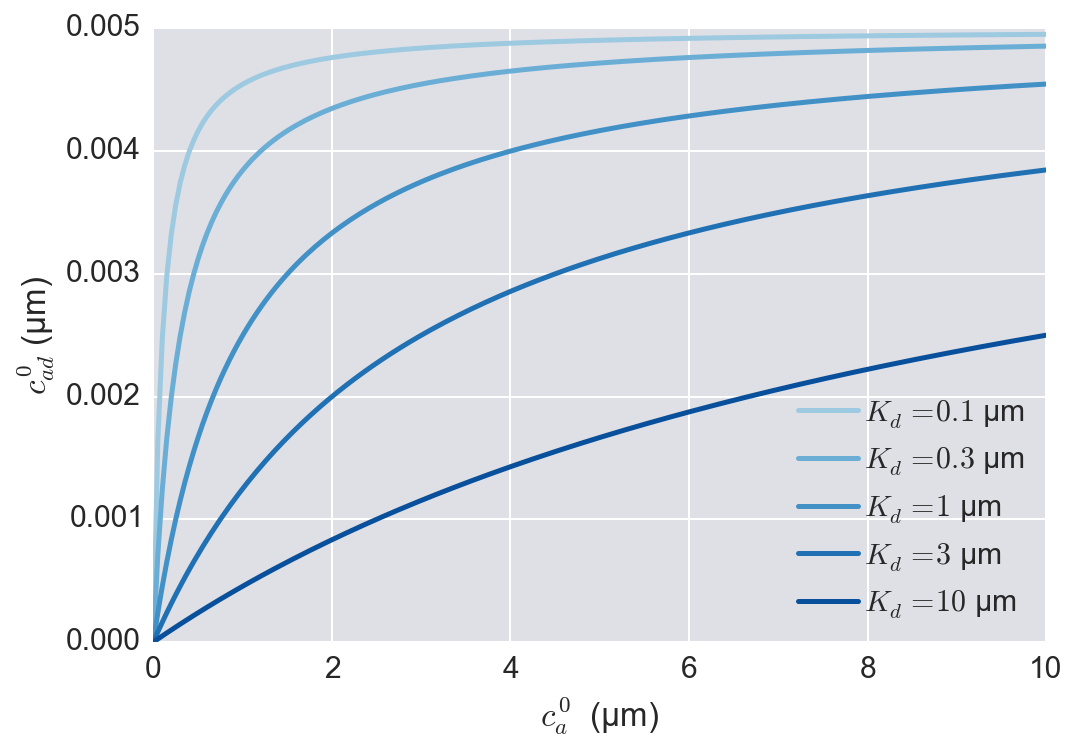

In [3]:
# Values of K_d to consider, units of micromolar (uM)
K_d = [0.1, 0.3, 1.0, 3.0, 10.0]

# Fixed S_D concentration, units of micromolar (uM)
c_d_0 = 0.005

# Varied actin concentration for plotting (uM)
c_a_0 = np.linspace(0.0, 10.0, 200)

# Make curves and plot
colors = sns.color_palette('Blues', 7)
for i in range(len(K_d)):
    # Compute c_ad over the values of c_a_0.
    c_ad = np.empty_like(c_a_0)
    for j in range(len(c_a_0)):
        c_ad[j] = c_ad_dissoc(K_d[i], c_a_0[j], c_d_0)

    # Make plot
    label = u'$K_d = %g$ µm' % K_d[i]
    plt.plot(c_a_0, c_ad, '-', color=colors[i+2], label=label)
    plt.xlabel(u'$c_a^0$ (µm)')
    plt.ylabel(u'$c_{ad}^0$ (µm)')
    plt.legend(loc='lower right')

The problem with this approach is that we do not have a direct way of measuring $c_{ad}$.  The authors instead employed [fluorescence anisotropy](http://en.wikipedia.org/wiki/Fluorescence_anisotropy).  I will not go into the details here of how it works, but will simply say that larger complexes rotate more slowly, and therefore give a higher fluorescence anisotropy signal (which is dimensionless) than do smaller complexes.

So, the authors fluorescently tagged $S_D$.  We will call this molecule $S_{D^*}$, with concentration $c_{d^*}$.  When free in solution, this molecule gives an anisotropy signal of $r_f$.  When bound to actin, it gives an anisotropy signal of $r_b$.  So, the total anisotropy signal we could detect is

\begin{align}
r = \frac{1}{c_{d^*}^0}\,\left(r_f c_{d^*} + r_b c_{ad^*}\right).
\end{align}

Clearly, when all $S_{D^*}$ is free, the anisotropy signal is $r_f$ and when all $S_{D^*}$ is bound to actin, the signal is $r_b$.  Remembering our conservation of mass, $c_{d^*} = c_{d^*}^0 - c_{ad^*}$, we have

\begin{align}
r = \frac{1}{c_{d^*}^0}\,\left(r_f (c_{d^*}^0 - c_{ad^*}) + r_b c_{ad^*}\right)
= r_f  + \frac{r_b-r_f}{c_{d^*}^0}\, c_{ad^*}.
\end{align}

Now, returning to our equilibrium expression, we have

\begin{align}
c_{ad^*} = \frac{1}{2}\left(K_d^* + c_a^0 + c_{d^*}^0 - \sqrt{\left(K_d^* + c_a^0 + c_{d^*}^0\right)^2 - 4c_a^0c_{d^*}^0}\right),
\end{align}

so we can write the measured anisotropy $r$ as a function of $K_d^*$ and the known quantities $c_a^0$ and $c_{d^*}^0$.  Note that we now have three parameters for our regression, $K_d^*$, $r_f$, and $r_b$, since the latter two are not known *a priori*.

This is all fine and good, but if we do this regression, we are measuring the dissociation constant of $S_{D^*}$, *not* $S_D$.  To get $K_d$, we can use the fact that we know $K_d^*$ from dissociation experiments described above.  Now, say we add monomeric actin, $S_{D^*}$, *and* $S_D$ to a reaction mixture.  Then, we have two reactions going on.

\begin{align}
\text{actin-}S_D &\rightleftharpoons \text{actin} + S_D \\[1mm]
\text{actin-}S_{D^*} &\rightleftharpoons \text{actin} + S_{D^*},
\end{align}

with equilibrium constants $K_d$ and $K_d^*$, respectively.  In this case, we have five equations describing equilibrium, the two equilibrium expressions and three conservation of mass expressions.

\begin{align}
K_d &= \frac{c_a c_d}{c_{ad}} \\[1mm]
K_d^* &= \frac{c_a c_{d^*}}{c_{ad^*}} \\[1mm]
c_a^0 &= c_a + c_{ad} + c_{ad^*}\\[1mm]
c_d^0 &= c_d + c_{ad} \\[1mm]
c_{d^*}^0 &= c_{d^*} + c_{ad^*}.
\end{align}

These five equations can be rearranged to give

\begin{align}
c_a^3 + \beta c_a^2 + \gamma c_a + \delta = 0,
\end{align}

with

\begin{align}
\beta &= K_d + K_d^* + c_d^0 + c_{d^*}^0 - c_a^0, \\[1mm]
\gamma &= K_d(c_{d^*}^0 - c_a^0) + K_d^*(c_d^0 - c_a^0) + K_d K_d^* \\[1mm]
\delta &= -K_d K_d^* c_a^0.
\end{align}

So, we can solve this third order polynomial for $c_a$.  We can then compute $c_{d^*}$ and $c_{ad^*}$ using the equilibrium and mass conservation relations for $S_{D^*}$ as

\begin{align}
c_{d^*} &= \frac{K_d^* c_{d^*}^0}{K_d^* + c_a} \\[1mm]
c_{ad^*} &= \frac{c_a c_{d^*}^0}{K_d^* + c_a}.
\end{align}

Given these expressions for $c_{ad^*}$ and $c_{d^*}$, we can compute the anistropy as a function of $K_d$, $K_d^*$, and the known quantities $c_a^0$, $c_d^0$, and $c_{d^*}^0$.

This looks like a complicated function for the anisotropy.  This is why researchers have consistently fit competition anisotropy data with approximate (wrong) functions.  In fact, the way most people have done this makes approximations that neglect the most dynamic part of the curve!  In practice, though, this is not a complicated function at all.  We can code it up in a few lines.  So, with a little thought and a little work, we can get a complete description of the titration curve.

In [4]:
# Returns anisotropy from competition experiment.
def competition_anisotropy(K_d, K_d_star, c_a_0, c_d_0, c_d_star_0, r_f, r_b):
    """
    Returns anisotropy measured from competition experiment.
    """
    # Define coeffiencts for third order polynomial
    beta = K_d + K_d_star + c_d_0 + c_d_star_0 - c_a_0
    gamma = K_d * (c_d_star_0 - c_a_0) + K_d_star * (c_d_0 - c_a_0) \
                    + K_d * K_d_star
    delta = -K_d * K_d_star * c_a_0
    
    # Compute roots (one of them is concentration of free actin)
    poly_roots = np.roots(np.array([1.0, beta, gamma, delta]))

    # Get index of root that we want (real, between 0 and c_a_0)
    inds = (np.isreal(poly_roots)) & (0 < poly_roots) & (poly_roots < c_a_0)
    c_a = poly_roots[inds][0]

    # Compute c_d* and c_ad*
    c_ad_star = c_a * c_d_star_0 / (K_d_star + c_a)
    c_d_star = c_d_star_0 - c_ad_star
    
    # Compute anisotropy
    return (r_f * c_d_star + r_b * c_ad_star) / c_d_star_0

So, we now have a function in hand that we can use to fit competition anisotropy data.  The strategy is to first perform regressions on titrations containing only $S_D^*$ and monomeric actin to get a value for $K_{d^*}$.  Then, we will use this result fo perform a regression on the competition anisotropy titrations to get a value for $K_d$.  You can use either optimization or MCMC (or both if you're feeling ambitious) to do the analysis.

**a)** When performing a regression on a titration curve, a Jeffreys prior is appropriate for a dissociation constant.  Give a physical explanation why.  *Hint*: Think back to general chemistry.

**b)** The file `rasson_dissociation_anisotropy.csv` contains two data sets for titrations where $c_{d^*}^0$ was held constant at 5 nM and monomeric actin was titrated.  For each $c_a^0$, the fluorescence anisotropy was measured.  For each of the two data sets, perform a regression to compute $K_d^*$ and its error bar. 

**c)** Treat the result of each regression as a "measurement" of $K_d^*$.  Given the two measurements, what values do we have for $K_d^*$ and its error bar?  (Note that this could be done using a hierarchical model, which we will talk about later in class.)

**d)** The file `rasson_competition_anisotropy.csv` contains four data sets of competition anisotropy experiments.  The total concentration of monomeric actin was held constant at $c_a^0 = 2$ µM.  The total concentration of $S_{D^*}$ was held constant at $c_{d^*}^0 = 5$ nM.  The total concentration of $S_D$, $c_d^0$, was varied to give the titration curve.  Perform a regression for each experiment to find a value for $K_d$.  In part (c), you found a value and error bar for $K_d^*$.  Use these values for $K_d^*$ to approximate its prior as a Gaussian in the regression of the competition anisotropy experiments.

**e)** Do a similar analysis as in part (c) to compute a value and error bar for $K_d$.

<br />